# PART 1b (continue)

## This notebook contains following contents:
### 1. Import Libraries
### 08. Compare your customer profiles with regions and departments and merging datasets
#### 8.1 Customer profile by region
##### 8.1a Compare age group with region using crosstab
##### 8.1b Compare income group with region using crosstab.
##### 8.1c Compare Departments with Regions using crosstab
##### 8.1d Compare Dependents and Region
#### 8.2 Customer Profing by Department Sales.
##### 8.2a Compare age group and department.
##### 8.2b Compare income group and department
##### 8.2c Compare department flag and department
#### 8.3 Profile by Frequency
##### 8.3a Income group
##### 8.3b Compare age group and Frequency
##### 8.3c Compare Department and Frequency
### Export Final datase
### Additional Comaprisions and Visualizations
#### 1. Visulaization of Top 10 departments
#### 2. Visualization of Average total order by customer loyalty
#### 3. Visualization of Age group and Income group
#### 4. Visualization of Age group and Dependents
#### 5. Customer Profile Heat Map
#### 6. Distribution of Customers by Loyalty
#### 7. Marital status Frequency Comparison
#### 8. Ordering Habits based on Family Status and Age

## 1. Import libraries

In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Turn the data folder into string 
path = r'/Users/amritkaur/Desktop/CF Data Immersion/Chapter 4/Achievement 4'

In [6]:
# Import most recent data set for merging
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'New_instacart.pkl'))

## 08. Compare your customer profiles with regions and departments and merging datasets

In [8]:
# Importing department dataframe
dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [9]:
dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
# Renaming index column as department_id
dept.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [11]:
dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [12]:
# Merge instacart dataset with department dataset
instacart_dept = instacart.merge(dept, on = 'department_id', how = 'left', indicator = True)

In [13]:
instacart_dept.shape

(30964564, 36)

In [14]:
# Exporting New Merged Dataframe
instacart_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_dept.pkl'))

In [15]:
# Importing Merged Data
instacart_dept = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_dept.pkl'))

In [16]:
instacart_dept.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,marital_status,income,region,age_group,income_group,dependents_flag,department,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,Adult,Low Income,Has Dependents,beverages,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2/17/2019,3,married,40423,South,Adult,Low Income,Has Dependents,dairy eggs,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,2/17/2019,3,married,40423,South,Adult,Low Income,Has Dependents,snacks,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,South,Adult,Low Income,Has Dependents,snacks,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,2/17/2019,3,married,40423,South,Adult,Low Income,Has Dependents,household,both


In [17]:
instacart_dept['department'].value_counts(dropna = False)

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

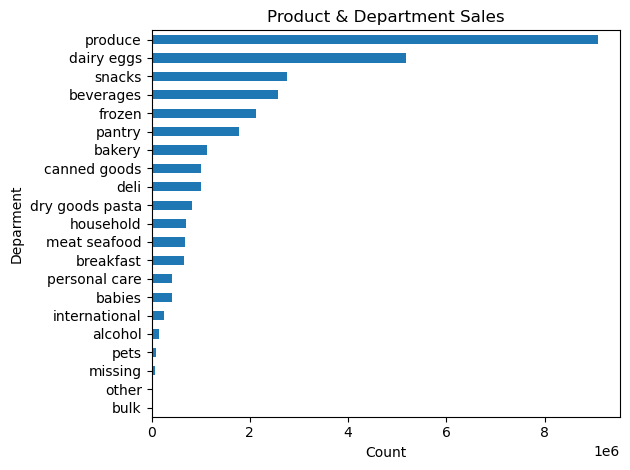

In [18]:
# Create the bar chart of Departments
dept_bar = instacart_dept['department'].value_counts().sort_values(ascending= True).plot.barh()
plt.title('Product & Department Sales')
plt.xlabel('Count')
plt.ylabel('Deparment')
plt.tight_layout()

In [19]:
#Exporting Bar Chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10','8.departments_product_bar.png'))

In [20]:
# Select only project's relevant columns
sample = instacart_dept[['user_id','age_group','income_group','dependents_flag','region','loyalty_flag']]

In [21]:
# Deleting the duplicate values
sample = sample.drop_duplicates()

In [22]:
sample.shape

(162631, 6)

In [23]:
sample

,user_id,age_group,income_group,dependents_flag,region,loyalty_flag
0,1,Adult,Low Income,Has Dependents,South,New customer
59,2,Senior,Middle Income,Has Dependents,West,Regular customer
254,3,Adult,Middle Income,Has Dependents,West,Regular customer
342,4,Adult,Low Income,Has Dependents,South,New customer
360,7,Adult,Middle Income,Has Dependents,Northeast,Regular customer
...,...,...,...,...,...,...
30963131,206203,Senior,High Income,Has Dependents,South,New customer
30963250,206206,Young Adult,Middle Income,Has Dependents,West,Loyal customer
30963535,206207,Senior,High Income,Has Dependents,Midwest,Regular customer
30963758,206208,Older Adult,High Income,Has Dependents,Midwest,Loyal customer


## 8.1 Customer profile by region

### 8.1a Compare age group with region using crosstab

In [26]:
age_region_comparison = pd.crosstab(instacart_dept['age_group'],instacart_dept['region'],dropna = False)

In [27]:
age_region_comparison 

region,Midwest,Northeast,South,West
age_group,,,,
Adult,1693049,1273976,2460039,1856851
Older Adult,2870703,2116310,3987077,3111207
Senior,1799606,1394490,2549034,1987704
Young Adult,898155,679909,1314989,971465


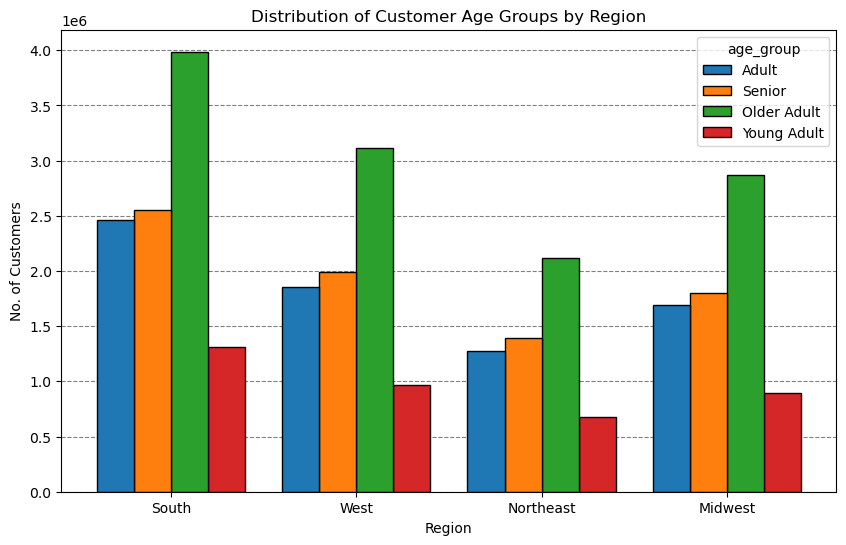

In [28]:
# Plot Histogram for age group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10','8.1a instacart_age_by_region.png'), bbox_inches = 'tight')
plt.show()

### 8.1b Compare income group with region using crosstab.

In [30]:
income_region_comparison = pd.crosstab(instacart_dept['income_group'],instacart_dept['region'],dropna = False)

In [31]:
income_region_comparison

region,Midwest,Northeast,South,West
income_group,,,,
High Income,3400093,2516484,4663571,3626880
Low Income,783764,587137,1142572,849081
Middle Income,3077656,2361064,4504996,3451266


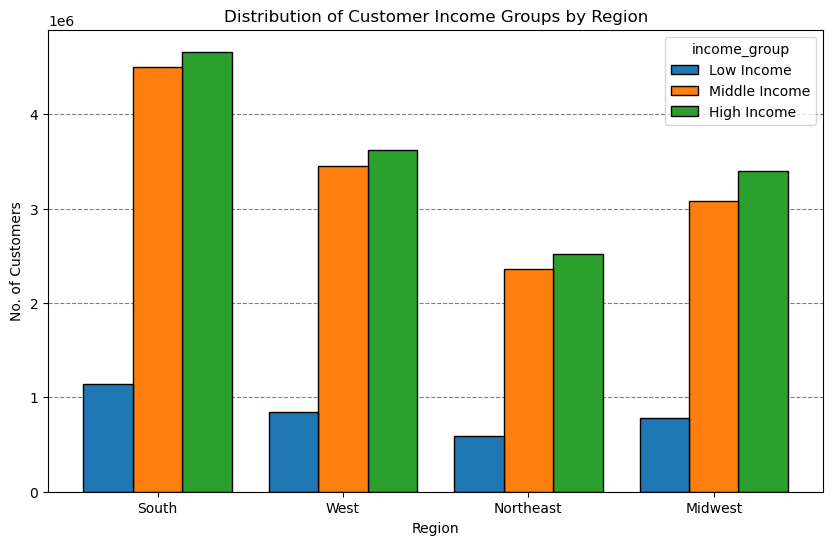

In [32]:
# Plot Histogram for income group and region comparison
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Income Groups by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10','8.1b instacart_income_by_region.png'), bbox_inches = 'tight')
plt.show()

### 8.1c Compare Departments with Regions using crosstab

In [34]:
dept_region_comparison = pd.crosstab(instacart_dept['department'],instacart_dept['region'],dropna = False)

In [35]:
dept_region_comparison

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


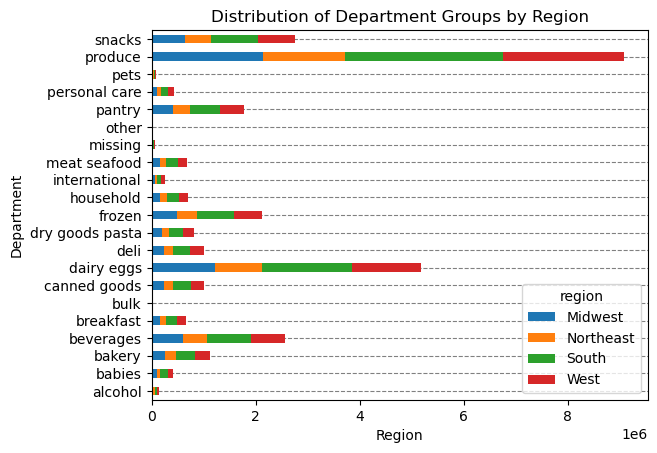

In [36]:
# Region_department Bar Chart
bar5 = dept_region_comparison.plot.barh(stacked =True)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Department Groups by Region')
plt.ylabel('Department')
plt.xlabel('Region')
# Exporting bar chart
bar5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10', '8.3c bar_region_department.png'))

### 8.1d Compare Dependents and Region

In [38]:
depend_region_comp  = pd.crosstab(instacart_dept['dependents_flag'],instacart_dept['region'],dropna = False)

In [39]:
depend_region_comp

region,Midwest,Northeast,South,West
dependents_flag,,,,
Has Dependents,5438697,4110203,7729206,5946777
No Dependents,1822816,1354482,2581933,1980450


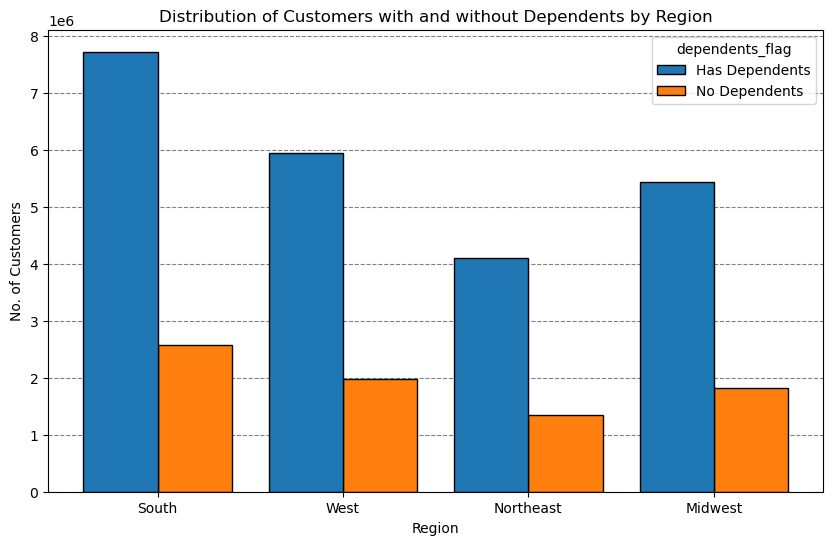

In [40]:
# Plot the histogram bars
plt.figure(figsize=(10, 6))
sns.histplot(data=instacart_dept, x='region', hue='dependents_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customers with and without Dependents by Region')
plt.ylabel('No. of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10','8.1d instacart_dependents_by_region.png'), bbox_inches = 'tight')
plt.show()

## 8.2 Customer Profing by Department Sales.

### 8.2a Compare age group and department.

In [43]:
age_dept_comp  = pd.crosstab(instacart_dept['department'],instacart_dept['age_group'],dropna = False)

In [44]:
age_dept_comp

age_group,Adult,Older Adult,Senior,Young Adult
department,,,,
alcohol,34623,56125,34691,19188
babies,96430,162566,100162,51234
bakery,262625,439872,278458,139873
beverages,597066,1010078,646414,318343
breakfast,156557,263325,165491,85477
bulk,7797,13012,8336,4306
canned goods,239510,394312,251940,126312
dairy eggs,1224854,2013796,1291039,647493
deli,236817,391999,250463,124555


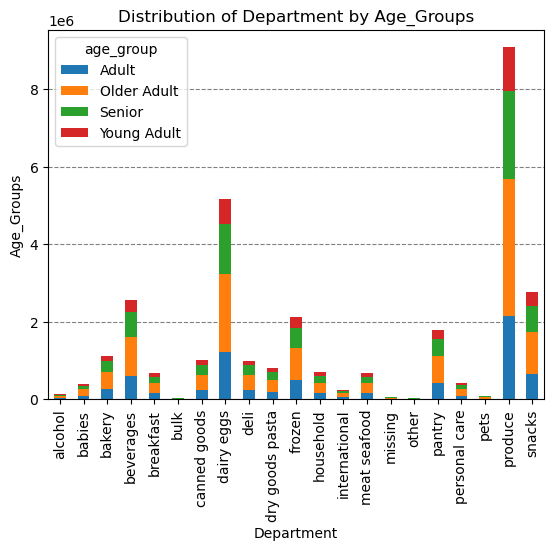

In [45]:
# Age Group and department Bar Chart
bar5 = age_dept_comp.plot.bar(stacked =True)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Department by Age_Groups')
plt.xlabel('Department')
plt.ylabel('Age_Groups')

# Exporting bar chart
bar5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10', '8.2 bar_age_gp_department.png'))

### 8.2b Compare income group and department

In [47]:
income_dept_comp  = pd.crosstab(instacart_dept['department'],instacart_dept['income_group'],dropna = False)

In [48]:
income_dept_comp

income_group,High Income,Low Income,Middle Income
department,,,
alcohol,69142,18047,57438
babies,196696,29240,184456
bakery,527703,106757,486368
beverages,1126437,383121,1062343
breakfast,297594,91408,281848
bulk,14218,4676,14557
canned goods,485226,78975,447873
dairy eggs,2406160,502363,2268659
deli,462089,106448,435297


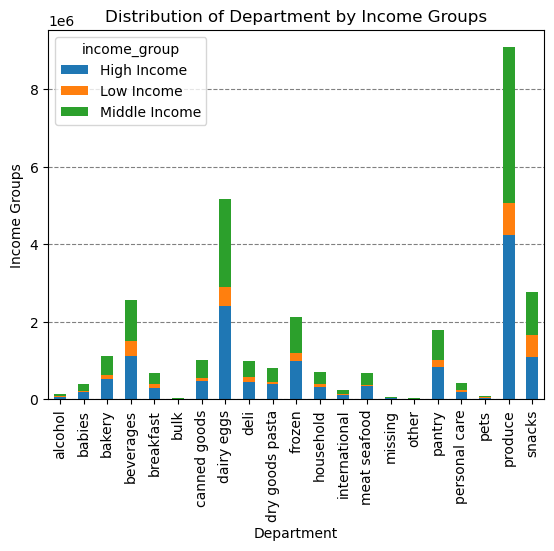

In [49]:
# Income Group_department Bar Chart

bar6 = income_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Income Groups')
plt.xlabel('Department')
plt.ylabel('Income Groups')

# Exporting bar chart

bar6.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10', '8.2b bar_income_gp_department.png'))

In [50]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = instacart_dept.groupby(['income_group', 'department']).size().reset_index(name='counts')

In [51]:
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

In [52]:
income_department_counts.head(50)

,income_group,department,counts
61,Middle Income,produce,4016038
49,Middle Income,dairy eggs,2268659
62,Middle Income,snacks,1102298
45,Middle Income,beverages,1062343
52,Middle Income,frozen,918102
58,Middle Income,pantry,776724
44,Middle Income,bakery,486368
48,Middle Income,canned goods,447873
50,Middle Income,deli,435297
51,Middle Income,dry goods pasta,364946


#### We have top 5 departments of all income those are produce, dairy eggs, snacks, beverages and frozen.

### 8.2c Compare department flag and department

In [55]:
depend_dept_comp  = pd.crosstab(instacart_dept['department'],instacart_dept['dependents_flag'],dropna = False)

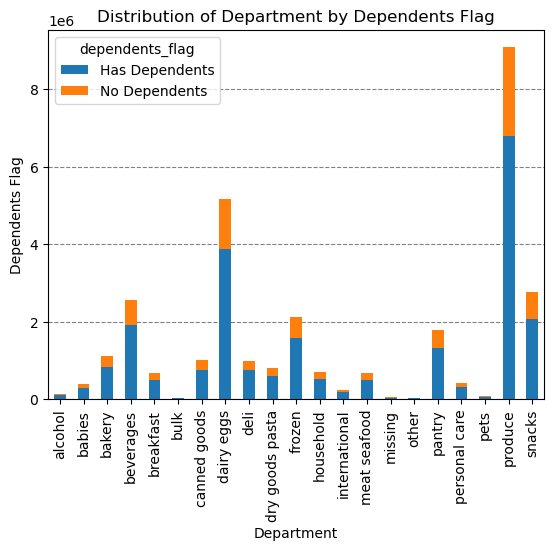

In [56]:
# Dependents Flag department Bar Chart
bar7 = depend_dept_comp.plot.bar(stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department by Dependents Flag')
plt.xlabel('Department')
plt.ylabel('Dependents Flag')

# Exporting bar chart

bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10','8.2c bar_depnd_department.png'))

## 8.3 Profile by Frequency

### 8.3a Income group

In [59]:
income_freq = pd.crosstab(instacart_dept['income_group'],instacart_dept['order_frequency_flag'],dropna = False)

In [60]:
income_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
High Income,9779323,1290502,3137203
Low Income,2199082,376138,787334
Middle Income,9226071,1228335,2940576


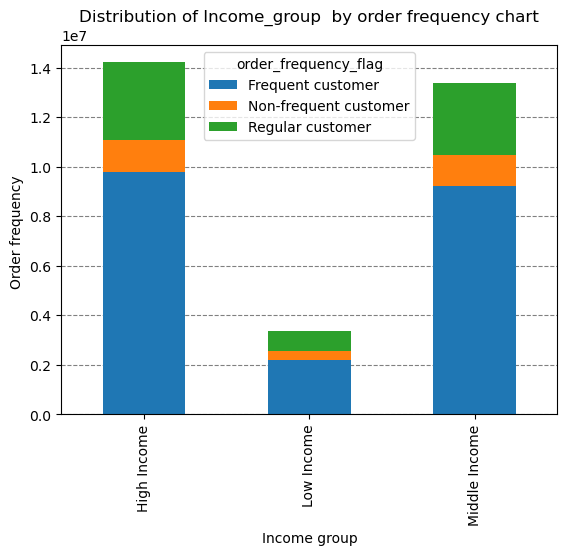

In [61]:
# Income Group and Order frequency Bar Chart

bar7 = income_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Income_group  by order frequency chart')
plt.ylabel('Order frequency ')
plt.xlabel('Income group')

# Exporting bar chart

bar7.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10', '8.3a bar_income_frequency.png'))

### 8.3b Compare age group and Frequency

In [63]:
age_freq = pd.crosstab(instacart_dept['age_group'], instacart_dept['order_frequency_flag'], dropna = False)

In [64]:
age_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
Adult,4975423,672918,1635574
Older Adult,8264416,1146065,2674816
Senior,5310708,717553,1702573
Young Adult,2653929,358439,852150


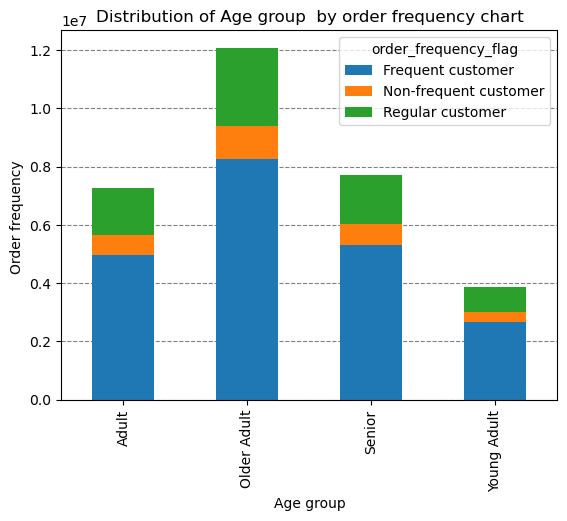

In [65]:
# Age Group and Order frequency Bar Chart

bar8 = age_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Age group  by order frequency chart')
plt.ylabel('Order frequency ')
plt.xlabel('Age group')

# Exporting bar chart

bar8.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10', '8.3b bar_age_freq.png'))

### 8.3c Compare Department and Frequency

In [67]:
dep_freq = pd.crosstab(instacart_dept['department'], instacart_dept['order_frequency_flag'], dropna = False)

In [68]:
dep_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
department,,,
alcohol,100491,13271,30865
babies,316214,25297,68881
bakery,770435,103019,247374
beverages,1756158,244136,571607
breakfast,455837,64106,150907
bulk,25087,2514,5850
canned goods,658729,108011,245334
dairy eggs,3623889,452920,1100373
deli,674588,98098,231148


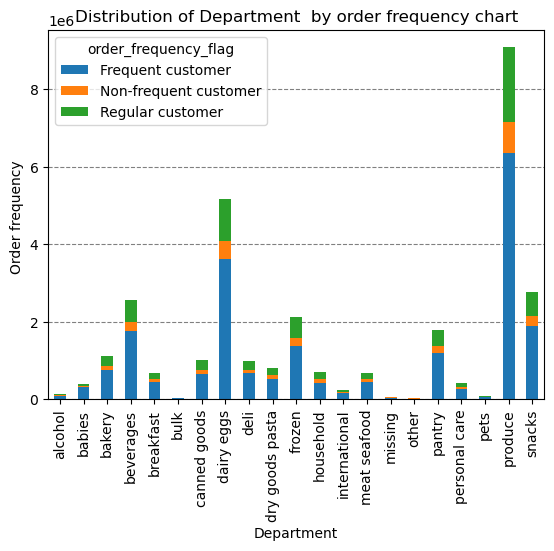

In [69]:
#dept_freq Bar Chart

bar9 = dep_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Department  by order frequency chart')
plt.ylabel('Order frequency ')
plt.xlabel('Department')

# Exporting bar chart
bar9.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10', '8.3c bar_dept_frequency.png'))

# Export Final dataset

In [71]:
instacart_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'instacart_final.pkl'))

# Additional Comparisions and Visualizations

# 1. Visulaization of Top 10 departments

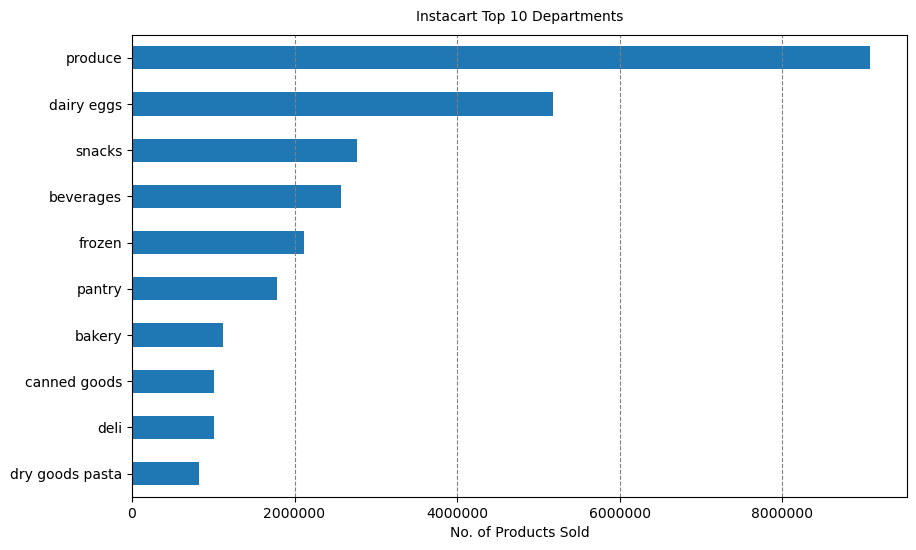

In [77]:
# Plot top 10 department bar chart.

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

instacart_dept['department'].value_counts().sort_values(ascending = False).head(10).plot.barh()
plt.title('Instacart Top 10 Departments', size=10, pad=10)
plt.xlabel('No. of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10', '9. Instacart_department_sales.png'), bbox_inches = 'tight')


# 2. Visualization of Average total order by customer loyalty

In [179]:
loyalty_order_total = instacart.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()
loyalty_order_total

,loyalty_flag,prices
0,New customer,7.801665
1,Regular customer,7.798262
2,Loyal customer,7.773575


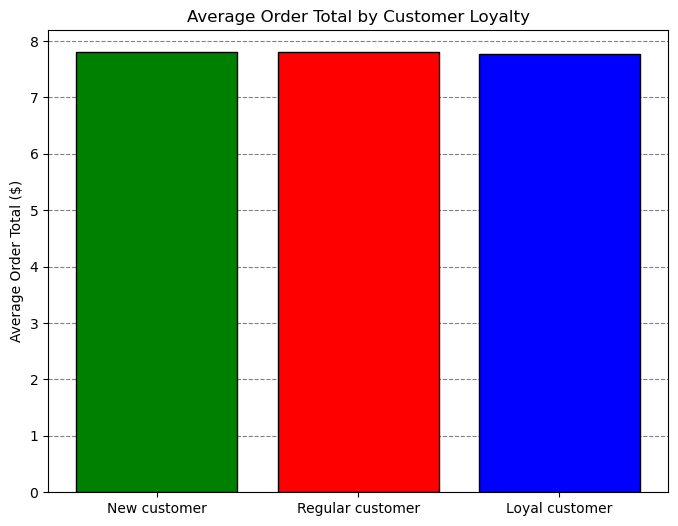

In [181]:
plt.figure(figsize=(8, 6))
colors = ['green', 'red', 'blue']

# Plot bars
bars = plt.bar(loyalty_order_total['loyalty_flag'], loyalty_order_total['prices'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10',  '9.1 instacart_average_order_by_loyalty.png'), bbox_inches = 'tight')

# 3. Visualization of Age group and Income group

In [183]:
age_income_compr = pd.crosstab (instacart['age_group'], instacart['income_group'],dropna = False)
age_income_compr

income_group,High Income,Low Income,Middle Income
age_group,,,
Adult,234817,1119794,5929304
Older Adult,8432714,1006126,2646457
Senior,5413785,637365,1679684
Young Adult,125712,599269,3139537


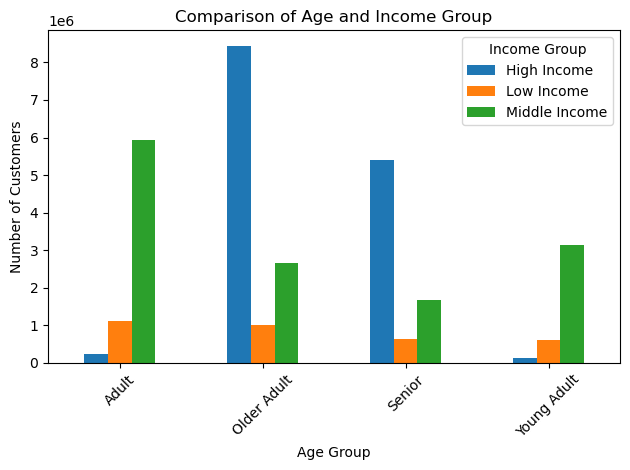

In [185]:
# Plot the  bar chart
age_income_compr.plot(kind='bar', stacked=False)
plt.title('Comparison of Age and Income Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.tight_layout()
age_income_compr = plt.gcf()
age_income_compr.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10',  '3. age_income_compr.png'), dpi=300, bbox_inches='tight')

# 4. Visualization of Age group and Dependents

In [187]:
# Comparing Age Group and Dependents
age_depend_compr = pd.crosstab (instacart['age_group'], instacart['dependents_flag'],dropna = False)
age_depend_compr

dependents_flag,Has Dependents,No Dependents
age_group,,
Adult,5456883,1827032
Older Adult,9031596,3053701
Senior,5825113,1905721
Young Adult,2911291,953227


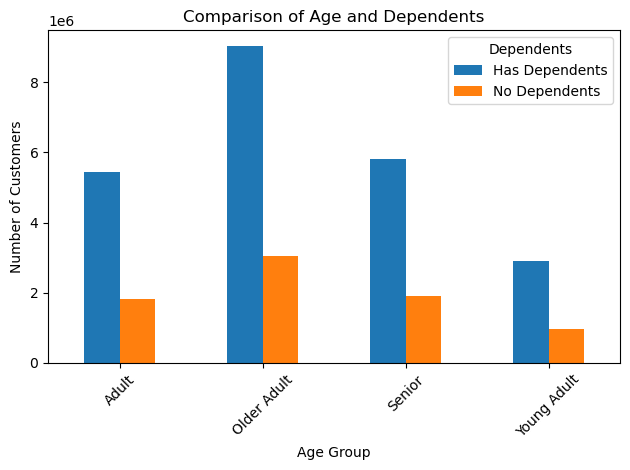

In [189]:
# Plot the  bar chart
age_depend_compr.plot(kind='bar', stacked=False)
plt.title('Comparison of Age and Dependents')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Dependents')
plt.tight_layout()
age_depend_compr = plt.gcf()
age_depend_compr.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10',  '4. age_depend_compr.png'), dpi=300, bbox_inches='tight')

# 5. Customer Profile Heat Map

In [191]:
customer_profile = instacart.groupby(['marital_status','dependents_flag','age_group','income_group']).size().unstack(fill_value=0)
customer_profile

income_group                                                  High Income  \
marital_status                   dependents_flag age_group                  
divorced/widowed                 No Dependents   Older Adult       508764   
                                                 Senior           1337438   
living with parents and siblings Has Dependents  Young Adult        47548   
married                          Has Dependents  Adult             177935   
                                                 Older Adult      6292100   
                                                 Senior           4076347   
                                                 Young Adult        44142   
single                           No Dependents   Adult              56882   
                                                 Older Adult      1631850   
                                                 Young Adult        34022   

income_group                                                  Low Income  \
marital_status                   dependents_flag age_group                 
divorced/widowed                 No Dependents   Older Adult       61433   
                                                 Senior           149277   
living with parents and siblings Has Dependents  Young Adult      220542   
married                          Has Dependents  Adult            830487   
                                                 Older Adult      753399   
                                                 Senior           488088   
                                                 Young Adult      223118   
single                           No Dependents   Adult            289307   
                                                 Older Adult      191294   
                                                 Young Adult      155609   

income_group                                                  Middle Income  
marital_status                   dependents_flag age_group                   
divorced/widowed                 No Dependents   Older Adult         169353  
                                                 Senior              419006  
living with parents and siblings Has Dependents  Young Adult        1213082  
married                          Has Dependents  Adult              4448461  
                                                 Older Adult        1986097  
                                                 Senior             1260678  
                                                 Young Adult        1162859  
single                           No Dependents   Adult              1480843  
                                                 Older Adult         491007  
                                                 Young Adult         763596

In [193]:
customer_profile_transposed = customer_profile.T
customer_profile_transposed

marital_status  divorced/widowed          living with parents and siblings  \
dependents_flag    No Dependents                            Has Dependents   
age_group            Older Adult   Senior                      Young Adult   
income_group                                                                 
High Income               508764  1337438                            47548   
Low Income                 61433   149277                           220542   
Middle Income             169353   419006                          1213082   

marital_status         married                                         single  \
dependents_flag Has Dependents                                  No Dependents   
age_group                Adult Older Adult   Senior Young Adult         Adult   
income_group                                                                    
High Income             177935     6292100  4076347       44142         56882   
Low Income              830487      753399   488088      223118        289307   
Middle Income          4448461     1986097  1260678     1162859       1480843   

marital_status                           
dependents_flag                          
age_group       Older Adult Young Adult  
income_group                             
High Income         1631850       34022  
Low Income           191294      155609  
Middle Income        491007      763596

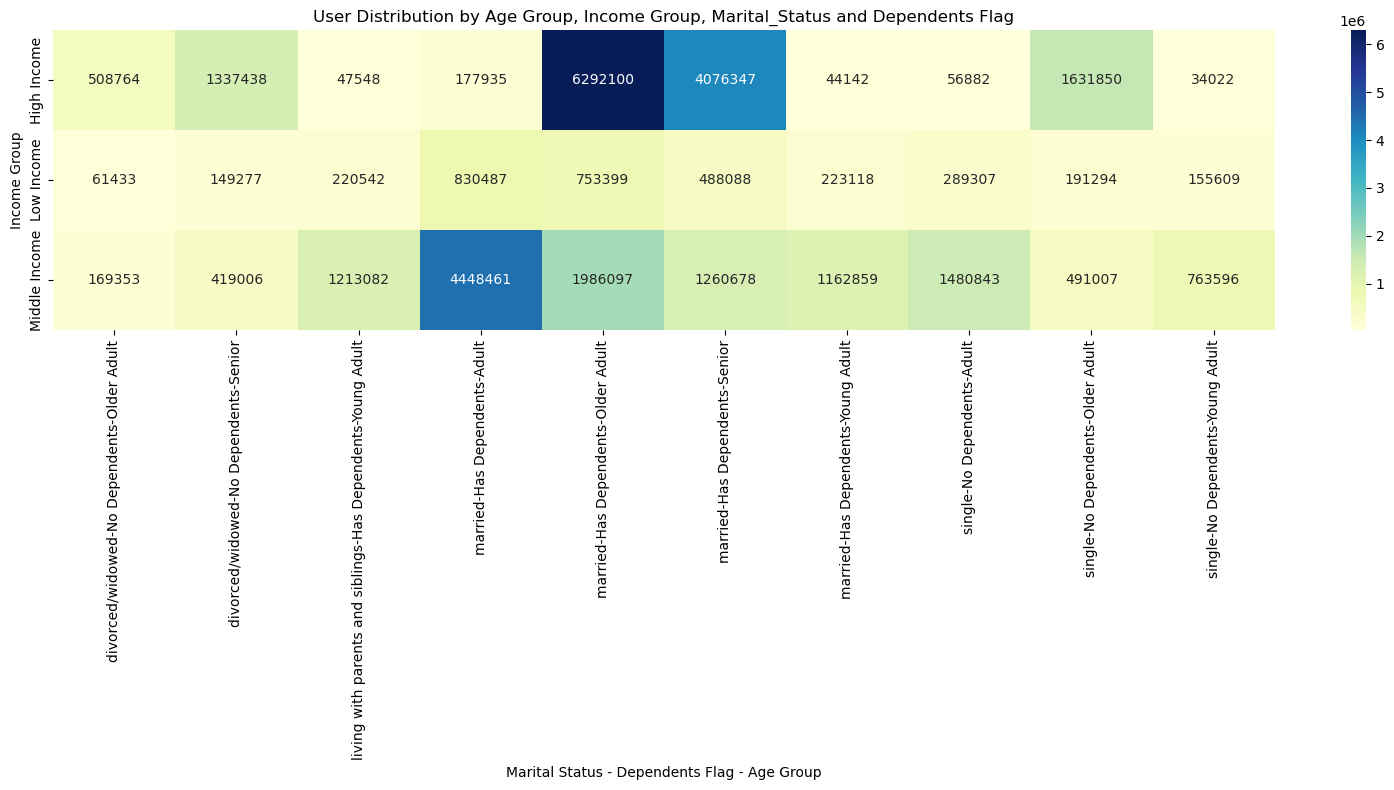

In [195]:
# Plot heat map
plt.figure(figsize=(16, 8))

sns.heatmap(customer_profile_transposed, annot=True, fmt='d', cmap='YlGnBu')
plt.title('User Distribution by Age Group, Income Group, Marital_Status and Dependents Flag')
plt.ylabel('Income Group')
plt.xlabel('Marital Status - Dependents Flag - Age Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10', '5. user_distribution_heatmap.png'), bbox_inches='tight')
plt.show()

## 6. Distribution of Customers by Loyalty

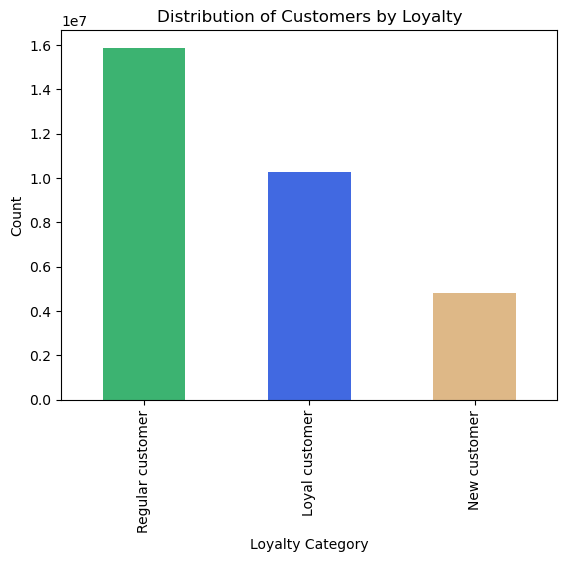

In [197]:
# Create bar chart on 'loyalty_flag' frequency

# Plot chart
bar_loyalty = instacart['loyalty_flag'].value_counts().plot.bar(color = ['mediumseagreen', 'royalblue', 'burlywood'])

# Set formatting
plt.title('Distribution of Customers by Loyalty')
plt.ylabel('Count')
plt.xlabel('Loyalty Category')
bar_loyalty = plt.gcf()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10',  '6. bar_loyalty.png'), bbox_inches = 'tight')

## 7.  Marital status Frequency Comparison

In [205]:
# Creating crosstab for marital status and frequency
marital_freq = pd.crosstab(instacart_dept['marital_status'], instacart_dept['order_frequency_flag'], dropna = False)
marital_freq

order_frequency_flag,Frequent customer,Non-frequent customer,Regular customer
marital_status,,,
divorced/widowed,1819123,243934,582214
living with parents and siblings,1030514,138646,312012
married,14888825,2039823,4815063
single,3466014,472572,1155824


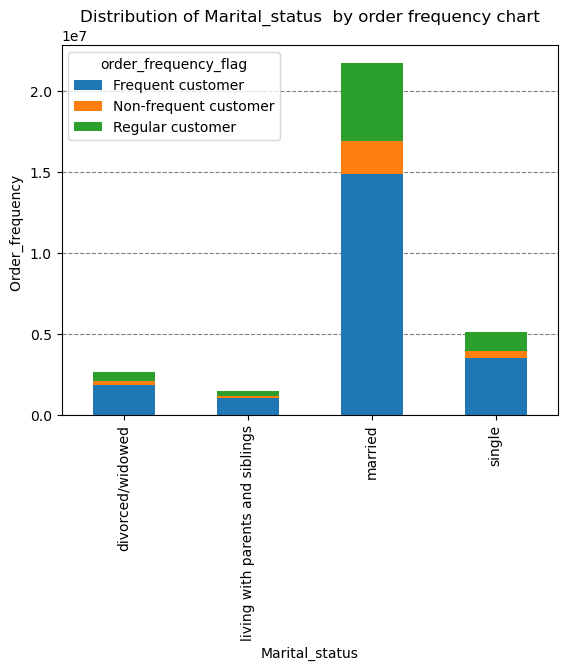

In [207]:
# Bar chart
bar9 = marital_freq.plot(kind='bar', stacked =True)

# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')

# General formatting
plt.title('Distribution of Marital_status  by order frequency chart')
plt.ylabel('Order_frequency ')
plt.xlabel('Marital_status')

# Exporting bar chart

bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 4.10','7. bar_marital_freq.png'))

## 8. Ordering Habits based on Family Status and Age

In [218]:
order_total_age_marital = instacart.groupby(['marital_status','age_group'])['prices'].mean().unstack(fill_value=0)
order_total_age_marital

age_group,Adult,Older Adult,Senior,Young Adult
marital_status,,,,
divorced/widowed,0.000000,7.797762,7.802276,0.000000
living with parents and siblings,0.000000,0.000000,0.000000,7.800604
married,7.786436,7.793655,7.791746,7.777638
single,7.784371,7.788032,0.000000,7.771346


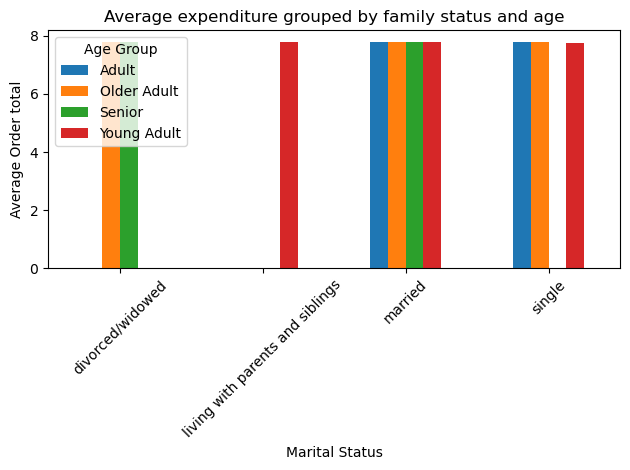

In [220]:
# Plot the grouped bar chart
order_total_age_marital.plot(kind='bar', stacked=False)
plt.title('Average expenditure grouped by family status and age')
plt.xlabel('Marital Status')
plt.ylabel('Average Order total')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
order_total_age_marital_status = plt.gcf()
order_total_age_marital_status.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 4.10',  '8. order_total_age_marital_status.png'), dpi=300, bbox_inches='tight')